# K-Nearest Neighbours


### Task 1

Draw a graph that shows the distribution of the various labels across the entire dataset.


In [9]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# loading dataset

dataset = np.load("data.npy", allow_pickle=True)

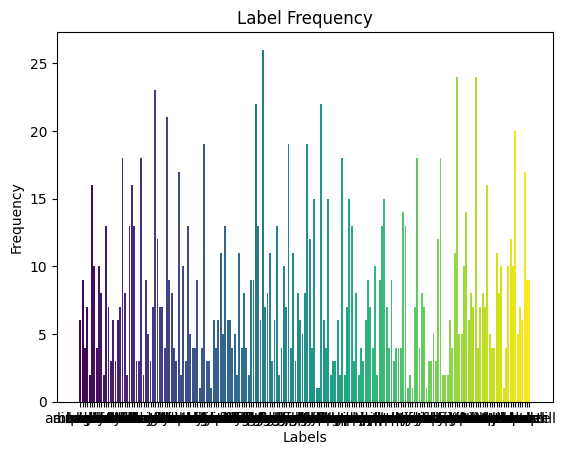

In [11]:
# trying to graphically represent the labels

# retrieve the labels
labels = dataset[:, 3]

# Calculate the frequency of each label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Generate different colors for each label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot the bar graph with different colors for each bar
plt.bar(unique_labels, label_counts, color=colors)

# Add labels and title
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Label Frequency")

plt.savefig("label_freq_graph.png")

# Show the plot
plt.show()

### Task 2

Create a KNN class where you implement the following:

1. Create a class where you can modify and access the encoder type, k, and distance metric (and any required parameter) of the class
2. Return the inference (prediction) when given the above parameters (encoder type, k, and distance metric).
3. Return the validation f-1 score, accuracy, precision, and recall after splitting the provided dataset into train and val subsets. You are allowed to use sklearn metrics for this part.


In [12]:
# splitting the dataset for training and testing

np.random.shuffle(dataset)
train_data, test_data = np.split(dataset, [1200])

In [13]:
# retrieving the specific columns for the training and testing data

resnet_train = train_data[:, 1]
resnet_test = test_data[:, 1]

vit_train = train_data[:, 2]
vit_test = test_data[:, 2]

labels_train = train_data[:, 3]
labels_test = test_data[:, 3]

In [14]:
# trying knn for euclidian dist and resnet val


def euclidian_dist(testdp, traindp):
    sub = testdp - traindp
    subsq = np.square(sub)
    subsqsum = np.sum(subsq)
    dist = np.sqrt(subsqsum)
    return dist


k = 5
pred_labels = []
for dptest in resnet_test:
    distances = {}
    index = 0
    for dptrain in resnet_train:
        dist = euclidian_dist(dptest, dptrain)
        distances[index] = dist
        index += 1
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])

    k_nearest_labels = {}
    maxfreq = 0
    maxfreqlabels = []
    for i in range(k):
        curr_label = labels_train[sorted_distances[i][0]]
        k_nearest_labels[curr_label] = (
            k_nearest_labels.get(labels_train[sorted_distances[i][0]], 0) + 1
        )
    for l, c in k_nearest_labels.items():
        if c > maxfreq:
            maxfreq = c
            pred_label = l
    pred_labels.append(pred_label)

print("Predicted labels:")
print(pred_labels)
print("Actual labels:")
print(labels_test.tolist())

accuracy = accuracy_score(labels_test, pred_labels)
precision = precision_score(labels_test, pred_labels, average="macro")
recall = recall_score(labels_test, pred_labels, average="macro")
f1 = f1_score(labels_test, pred_labels, average="macro")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Predicted labels:
['butterfly', 'face', 'tomato', 'snake', 'shark', 'chair', 'pizza', 'candle', 'chair', 'plant', 'spoon', 'fishing', 'sad', 'sing', 'fish', 'shoe', 'windmill', 'tree', 'hammer', 'cigarette', 'bird', 'sun', 'bullet', 'knife', 'arrow', 'helicopter', 'tent', 'dive', 'rain', 'table', 'shoe', 'table', 'mug', 'potato', 'saturn', 'clean', 'shoe', 'chair', 'pillow', 'clap', 'climb', 'windmill', 'clock', 'bend', 'fishing', 'sleep', 'bucket', 'spoon', 'wheel', 'spider', 'paintbrush', 'van', 'gym', 'door', 'plant', 'boat', 'rain', 'fly', 'potato', 'tree', 'deer', 'postcard', 'loudspeaker', 'rain', 'run', 'love', 'candle', 'tree', 'table', 'sweater', 'spiderman', 'fishing', 'loudspeaker', 'clock', 'clean', 'love', 'candle', 'helicopter', 'close', 'table', 'bee', 'telephone', 'smile', 'clock', 'van', 'fish', 'ladder', 'door', 'rain', 'hammer', 'love', 'laptop', 'shoe', 'camera', 'roof', 'sad', 'ladder', 'boat', 'goldfish', 'candle', 'hammer', 'shark', 'gym', 'spider', 'happy', 'can

In [15]:
# testing knn using custom class

from knn import KNN

k = 7
distance_metric = "cosine"
encoder_type = "resnet"

knnobj = KNN(k, distance_metric, encoder_type, train_data, test_data)
knnobj.predict(displayPred=True, metrics=True)

Predicted labels:
['butterfly', 'run', 'tomato', 'snake', 'shark', 'chair', 'pizza', 'candle', 'bench', 'plant', 'spoon', 'fishing', 'sad', 'sing', 'fish', 'shoe', 'windmill', 'tree', 'hammer', 'cigarette', 'bucket', 'sun', 'bullet', 'knife', 'arrow', 'cow', 'tent', 'dive', 'rain', 'rain', 'shoe', 'table', 'mug', 'windmill', 'saturn', 'clean', 'shoe', 'chair', 'pillow', 'clap', 'climb', 'windmill', 'frog', 'bend', 'bend', 'sleep', 'bucket', 'spoon', 'wheel', 'spider', 'parachute', 'van', 'gym', 'door', 'plant', 'boat', 'rain', 'fly', 'potato', 'fish', 'deer', 'table', 'dustbin', 'rain', 'run', 'love', 'candle', 'tree', 'table', 'sweater', 'spiderman', 'fishing', 'loudspeaker', 'clock', 'clean', 'love', 'snake', 'helicopter', 'lazy', 'table', 'bear', 'telephone', 'happy', 'clock', 'van', 'fish', 'ladder', 'keyboard', 'rain', 'hammer', 'love', 'laptop', 'chair', 'camera', 'roof', 'sad', 'ladder', 'boat', 'butterfly', 'candle', 'hammer', 'saturn', 'tree', 'spider', 'happy', 'candle', 'sna

['butterfly',
 'run',
 'tomato',
 'snake',
 'shark',
 'chair',
 'pizza',
 'candle',
 'bench',
 'plant',
 'spoon',
 'fishing',
 'sad',
 'sing',
 'fish',
 'shoe',
 'windmill',
 'tree',
 'hammer',
 'cigarette',
 'bucket',
 'sun',
 'bullet',
 'knife',
 'arrow',
 'cow',
 'tent',
 'dive',
 'rain',
 'rain',
 'shoe',
 'table',
 'mug',
 'windmill',
 'saturn',
 'clean',
 'shoe',
 'chair',
 'pillow',
 'clap',
 'climb',
 'windmill',
 'frog',
 'bend',
 'bend',
 'sleep',
 'bucket',
 'spoon',
 'wheel',
 'spider',
 'parachute',
 'van',
 'gym',
 'door',
 'plant',
 'boat',
 'rain',
 'fly',
 'potato',
 'fish',
 'deer',
 'table',
 'dustbin',
 'rain',
 'run',
 'love',
 'candle',
 'tree',
 'table',
 'sweater',
 'spiderman',
 'fishing',
 'loudspeaker',
 'clock',
 'clean',
 'love',
 'snake',
 'helicopter',
 'lazy',
 'table',
 'bear',
 'telephone',
 'happy',
 'clock',
 'van',
 'fish',
 'ladder',
 'keyboard',
 'rain',
 'hammer',
 'love',
 'laptop',
 'chair',
 'camera',
 'roof',
 'sad',
 'ladder',
 'boat',
 'but

### Task 3

#### Hyperparameter Tuning

1. Find the best (k, encoder, distance metric) triplet that gives the best validation accuracy for a given data split (your choice).
2. Print an Ordered rank list of top 20 such triplets.
3. Plot k vs accuracy given a choice(yours) of any given distance, encoder pair (with a constant data split).


In [16]:
# hyperparameter tuning

distance_metrics = ["euclidean", "manhattan", "cosine"]
encoder_types = ["resnet", "vit"]

metrics = {}

import warnings

warnings.filterwarnings("ignore")

# trying different values of k
for k in range(1, 150):
    # trying different distance metrics
    for distance_metric in distance_metrics:
        # trying different encoder types
        for encoder_type in encoder_types:
            print(
                f"K: {k}, Distance Metric: {distance_metric}, Encoder Type: {encoder_type}"
            )
            knnobj = KNN(k, distance_metric, encoder_type, train_data, test_data)
            predictions = knnobj.predict(displayPred=False, metrics=False)
            accuracy, precision, recall, f1 = knnobj.calc_scores(
                predictions, display=False
            )
            print(f"Accuracy: {accuracy * 100:.2f}%")
            metrics[(k, distance_metric, encoder_type)] = accuracy
            print()

# sorting based on accuracy
sorted_metrics = sorted(metrics.items(), key=lambda x: x[1], reverse=True)
# print("Sorted metrics:")
# print(sorted_metrics)

print("Best triplet:")
print(sorted_metrics[0])

print("Top 20 triplets:")
for i in range(20):
    print(sorted_metrics[i])

K: 1, Distance Metric: euclidean, Encoder Type: resnet
Accuracy: 18.67%

K: 1, Distance Metric: euclidean, Encoder Type: vit
Accuracy: 31.33%

K: 1, Distance Metric: manhattan, Encoder Type: resnet
Accuracy: 20.67%

K: 1, Distance Metric: manhattan, Encoder Type: vit
Accuracy: 29.67%

K: 1, Distance Metric: cosine, Encoder Type: resnet
Accuracy: 21.00%

K: 1, Distance Metric: cosine, Encoder Type: vit
Accuracy: 28.67%

K: 2, Distance Metric: euclidean, Encoder Type: resnet
Accuracy: 18.67%

K: 2, Distance Metric: euclidean, Encoder Type: vit
Accuracy: 31.33%

K: 2, Distance Metric: manhattan, Encoder Type: resnet
Accuracy: 20.67%

K: 2, Distance Metric: manhattan, Encoder Type: vit
Accuracy: 29.67%

K: 2, Distance Metric: cosine, Encoder Type: resnet
Accuracy: 21.00%

K: 2, Distance Metric: cosine, Encoder Type: vit
Accuracy: 28.67%

K: 3, Distance Metric: euclidean, Encoder Type: resnet
Accuracy: 20.00%

K: 3, Distance Metric: euclidean, Encoder Type: vit
Accuracy: 33.00%

K: 3, Dista

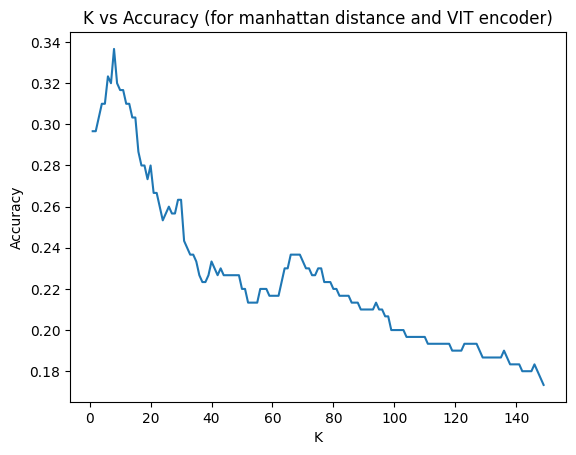

In [17]:
# Plot k vs accuracy for any particular given distance, encoder pair (with a constant data split).

k_values = []
accuracy_values = []
for k in range(1, 150):
    knnobj = KNN(k, "manhattan", "vit", train_data, test_data)
    predictions = knnobj.predict(displayPred=False, metrics=False)
    accuracy, precision, recall, f1 = knnobj.calc_scores(predictions, display=False)
    k_values.append(k)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy (for manhattan distance and VIT encoder)")
plt.savefig("k_vs_accuracy.png")
plt.show()
